In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [295]:
agent = 'Ant'
n_evals = 12

if agent == 'Hopper':
    folder = 'HopperTest'
    y_max = 4000
    y_min = 0
    n_tests = [118, 120, 123, 126, 121, 122, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135]
    n_iters = [200, 200, 200, 400, 200, 200, 200, 200, 200, 200, 200, 150, 200, 79, 200, 95]
    # clean_idx = [3,5,6]
    clean_idx = [0,3,7,9,10,11,12,13,14,15]
    # crazy_ones = [5,6]
    characteristic = ['base  (3 to 2, 3e-3, 3N, ld:0, z:1e-1, 9 to 1)', 'equal exploration and distin. (1 to 1)', 
            'exploration over distin. (2 to 3)', 'slower concepts (3e-4)', 
            'no concept learning', 'distin. over exploration (3 to 1)', 
            'inconsistent (zeta=0)', 'larger upper period (5N)',
            'even slower concepts (3e-5)', 'latent dim 100', 
            'reward always (3e-5, 5N)', 'extreme consistency (z:1)',
            'latent dim 10', 'kl_div inconsistency metric (not correct)',
            'skills over concepts (19 to 1)', 'kl_div inconsistency metric (z:1)']
    
elif agent == 'Ant':
    folder = 'AntLeftRight_v2'
    y_max = 7000
    y_min = -4000
    n_tests = [100, 101]
    n_iters = [400, 600]
    clean_idx = [0,1]
    characteristic = ['base  (3 to 2, 3e-4, 3N, ld:0, z:1e-1, 9 to 1)', 'rs:10, nu:2']
else:
    pass

In [296]:
rewards = []
cumulative_mean_rewards = []
mean_rewards = []
max_rewards = []
min_rewards = []
std_rewards = []
t = []
t_iter = []
metrics = []
cumulative_metrics = []

In [297]:
# import pickle
# params_120 = pickle.load(open('HopperTest/'+str(120)+'/agent_params.p','rb'))
# params_122 = pickle.load(open(folder+'/'+str(133)+'/agent_params.p','rb'))

In [298]:
# params_122

In [299]:
for i in range(len(n_tests)):
    rewards.append(np.loadtxt(folder+'/'+str(n_tests[i])+'/mean_rewards.txt'))
    rewards[i] = rewards[i].reshape(-1,n_evals)[:n_iters[i],:]
    
    cumulative_mean_rewards.append(np.cumsum(rewards[i].mean(1))/np.linspace(1,n_iters[i],n_iters[i]))
    
    mean_rewards.append(rewards[i].mean(1))
    max_rewards.append(rewards[i].max(1))
    min_rewards.append(rewards[i].min(1))
    std_rewards.append(rewards[i].std(1))
    t.append(np.linspace(1,rewards[i].shape[0],rewards[i].shape[0])*10000)
    
    metrics.append(np.loadtxt(folder+'/'+str(n_tests[i])+'/metrics.txt')[:n_iters[i],:])
    cumulative_metrics.append(np.cumsum(metrics[-1], axis=0)/np.linspace(1,n_iters[i],n_iters[i]).reshape(-1,1))

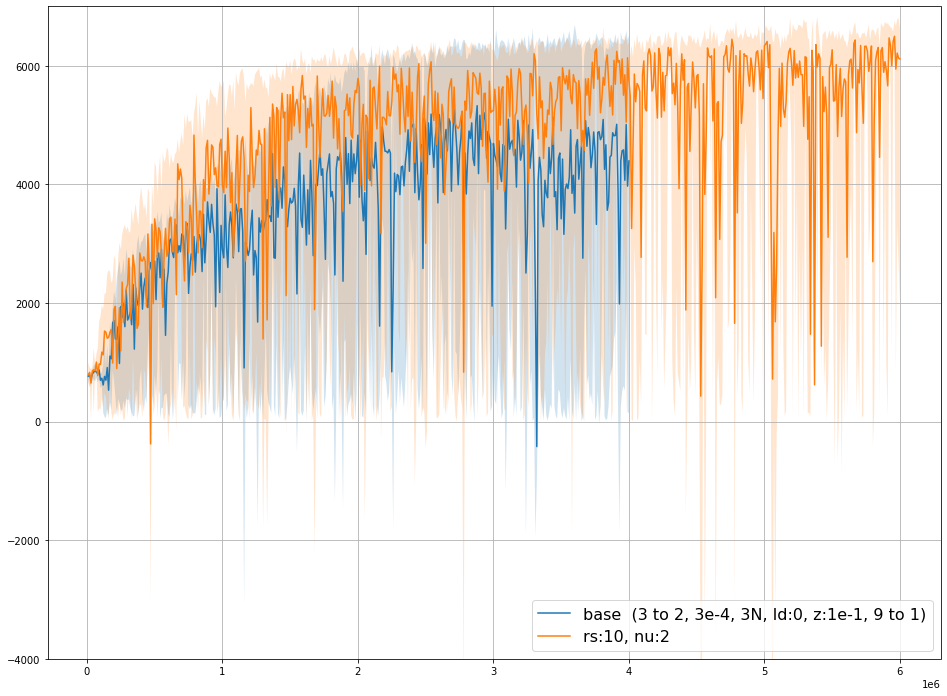

In [300]:
plt.figure(figsize=(16,12))
for i in range(len(clean_idx)):
    plt.plot(t[clean_idx[i]], mean_rewards[clean_idx[i]], label=characteristic[clean_idx[i]])
    plt.fill_between(t[clean_idx[i]], min_rewards[clean_idx[i]], max_rewards[clean_idx[i]], alpha=0.20)
    # plt.fill_between(t[i], mean_rewards[i]-std_rewards[i], mean_rewards[i]+std_rewards[i], alpha=0.2) # , color='#82A1FF'
# for i in range(len(n_tests)):
#     plt.plot(t[i], np.zeros(rewards[i].shape[0]), c='r')
#     plt.plot(t[i], cumulative_mean_rewards[i])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ylim(y_min,y_max)
plt.grid()
plt.legend(loc=4, fontsize=16)
plt.savefig(agent+'_performance.png', dpi=300)
plt.show()
plt.close()

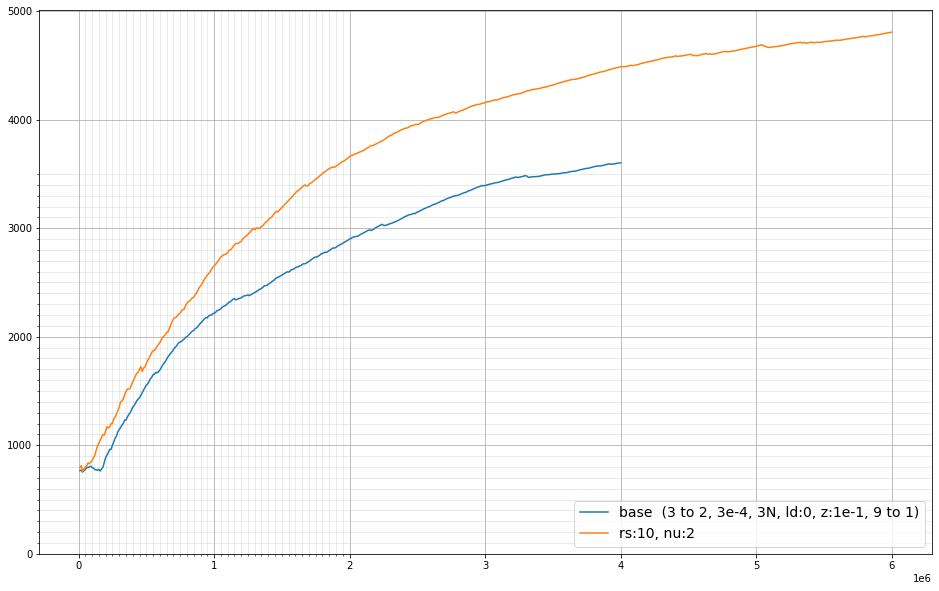

In [301]:
x_minor_ticks = np.arange(0, 2000000, 50000)
y_minor_ticks = np.arange(0, 3501, 100)
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1, 1, 1)
#plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.tab10(np.linspace(0.1, 1, len(n_tests)))))
for i in range(len(clean_idx)):
    plt.plot(t[clean_idx[i]], cumulative_mean_rewards[clean_idx[i]], label=characteristic[clean_idx[i]])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set_xticks(x_minor_ticks, minor=True)
ax.set_yticks(y_minor_ticks, minor=True)
plt.grid(which='both')
ax.grid(which='minor', alpha=0.3)
plt.legend(loc=4, fontsize=14)
plt.savefig(agent+'_cumulative_performance.png', dpi=300)
plt.show()
plt.close()

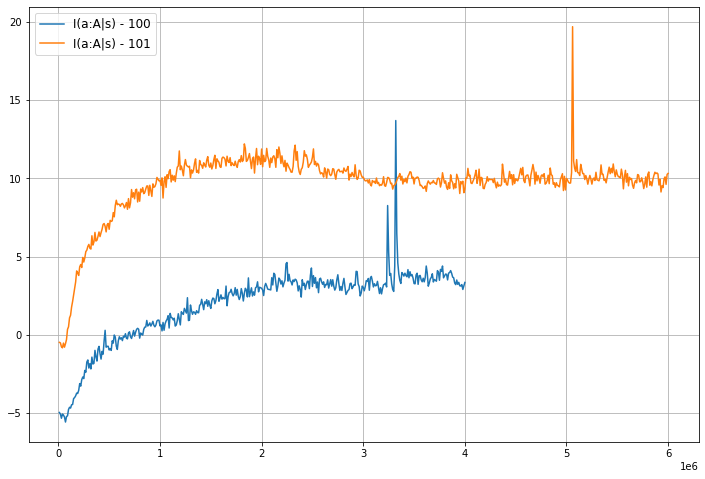

In [302]:
plt.figure(figsize=(12,8))
for i in range(0,len(clean_idx)):
    #plt.plot(t[i], metrics[i][:,0], label='H(a|s,A) - '+str(n_tests[i]))
    #plt.plot(t[i], metrics[i][:,11], label='H(a|s) - '+str(n_tests[i]))
    plt.plot(t[clean_idx[i]], metrics[clean_idx[i]][:,12], label='I(a:A|s) - '+str(n_tests[clean_idx[i]]))
    # plt.plot(t[i], metrics[i][:,0]+metrics[i][:,11])
    # plt.plot(t[i], np.zeros(t[i].shape[0]), c='r', alpha=0.2)
    # plt.plot(t[i], cumulative_metrics[i][:,0])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# plt.yscale('log')
plt.legend(fontsize=12)
plt.grid()
plt.savefig(agent+'_HA_as.png', dpi=300)
plt.show()
plt.close()

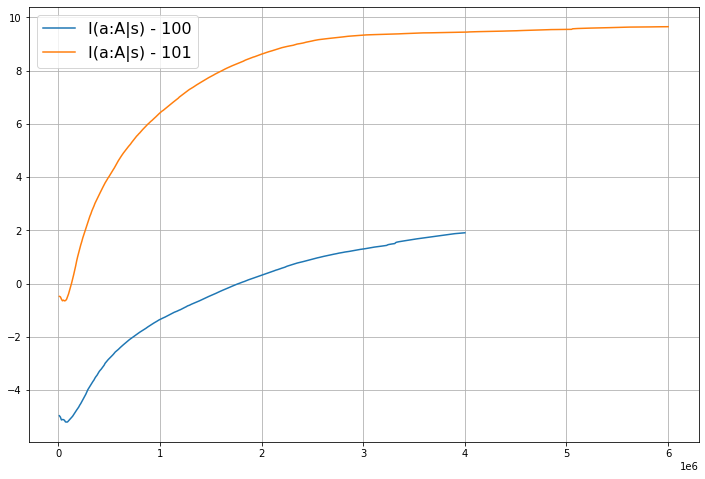

In [303]:
plt.figure(figsize=(12,8))
for i in range(0,len(clean_idx)):
    plt.plot(t[clean_idx[i]], cumulative_metrics[clean_idx[i]][:,12], label='I(a:A|s) - '+str(n_tests[clean_idx[i]]))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(fontsize=16)
plt.grid()
plt.savefig(agent+'_cumulative_HA_as.png', dpi=300)
plt.show()
plt.close()

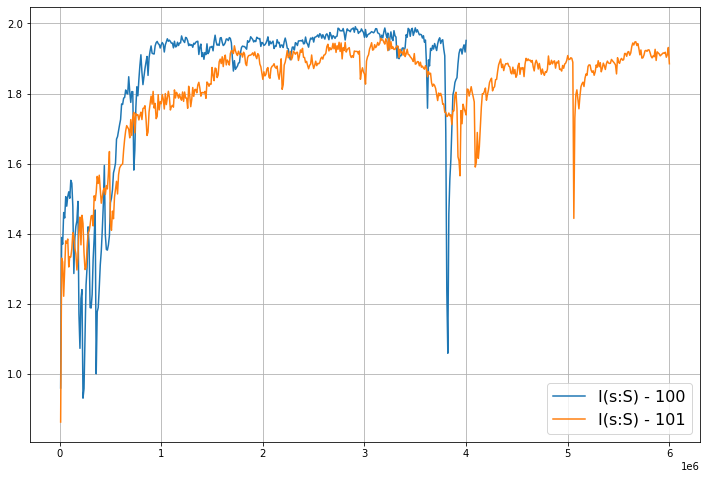

In [304]:
plt.figure(figsize=(12,8))
for i in range(0,len(clean_idx)):
    plt.plot(t[clean_idx[i]], metrics[clean_idx[i]][:,3], label='I(s:S) - '+str(n_tests[clean_idx[i]]))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid()
plt.legend(fontsize=16)
plt.savefig(agent+'_ISs.png', dpi=300)
plt.show()
plt.close()

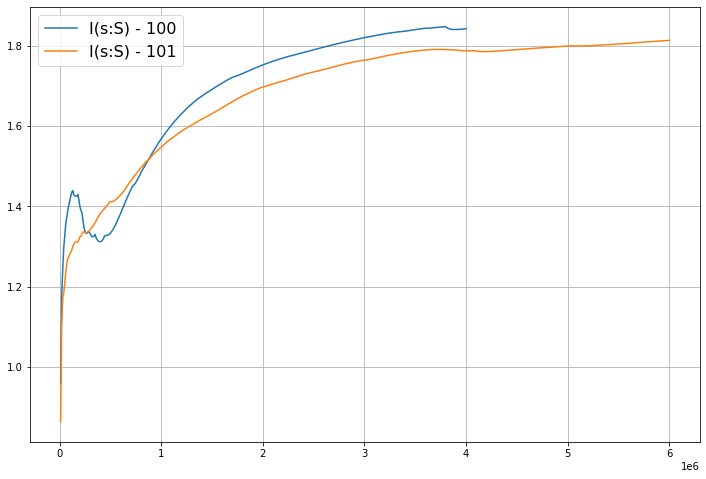

In [305]:
plt.figure(figsize=(12,8))
for i in range(0,len(clean_idx)):
    plt.plot(t[clean_idx[i]], cumulative_metrics[clean_idx[i]][:,3], label='I(s:S) - '+str(n_tests[clean_idx[i]]))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(fontsize=16)
plt.grid()
plt.savefig(agent+'_cumulative_ISs.png', dpi=300)
plt.show()
plt.close()

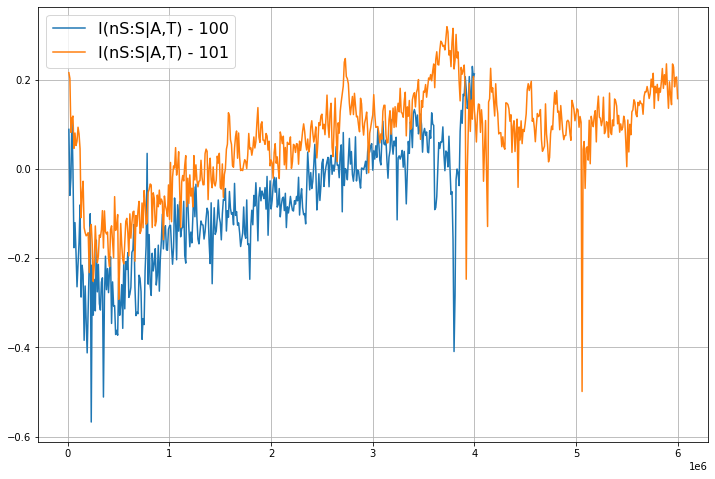

In [306]:
plt.figure(figsize=(12,8))
for i in range(0,len(clean_idx)):
    plt.plot(t[clean_idx[i]], metrics[clean_idx[i]][:,7], label='I(nS:S|A,T) - '+str(n_tests[clean_idx[i]]))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid()
plt.legend(fontsize=16)
plt.savefig(agent+'_InSS.png', dpi=300)
plt.show()
plt.close()

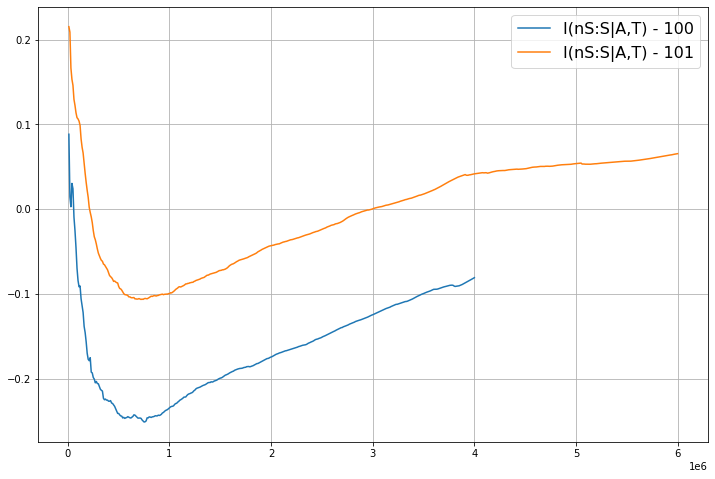

In [307]:
plt.figure(figsize=(12,8))
for i in range(0,len(clean_idx)):
    plt.plot(t[clean_idx[i]], cumulative_metrics[clean_idx[i]][:,7], label='I(nS:S|A,T) - '+str(n_tests[clean_idx[i]]))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(fontsize=16)
plt.grid()
plt.savefig(agent+'_cumulative_InSS.png', dpi=300)
plt.show()
plt.close()

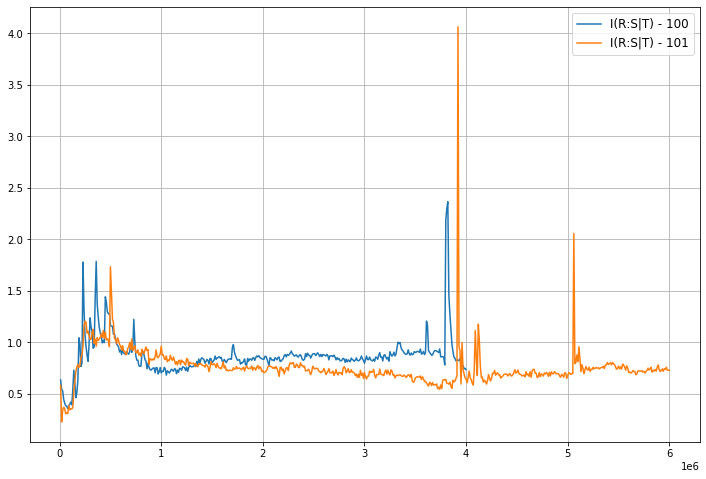

In [308]:
plt.figure(figsize=(12,8))
for i in range(0,len(clean_idx)):
    plt.plot(t[clean_idx[i]], metrics[clean_idx[i]][:,10], label='I(R:S|T) - '+str(n_tests[clean_idx[i]]))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid()
plt.legend(fontsize=12)
plt.savefig(agent+'_IRS_T.png', dpi=300)
plt.show()
plt.close()

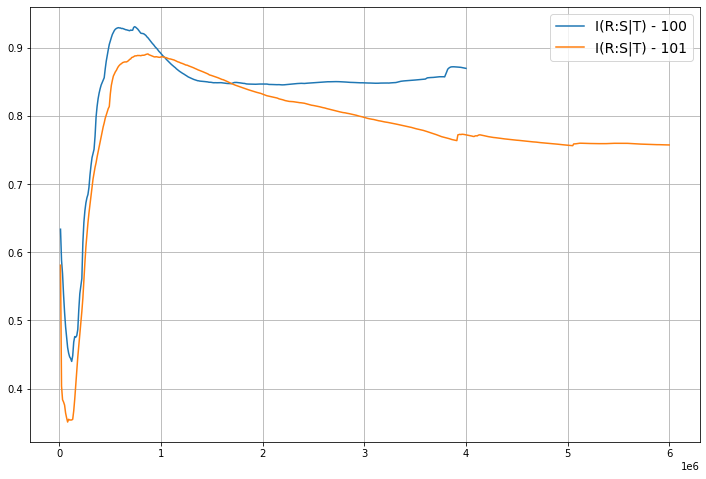

In [309]:
plt.figure(figsize=(12,8))
for i in range(0,len(clean_idx)):
    plt.plot(t[clean_idx[i]], cumulative_metrics[clean_idx[i]][:,10], label='I(R:S|T) - '+str(n_tests[clean_idx[i]]))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(fontsize=14)
plt.grid()
plt.savefig(agent+'_cumulative_IRS_T.png', dpi=300)
plt.show()
plt.close()